<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/04_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arranging data into folder structure

In [2]:
pip install tensorflow==2.14.0 tensorflow-hub==0.15.0 keras==2.14.0

In [3]:
!nvidia-smi

Sat Jan 11 21:58:59 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:

!kaggle datasets download khushipitroda/sun-and-moon-images

Dataset URL: https://www.kaggle.com/datasets/khushipitroda/sun-and-moon-images
License(s): other
 20% 5.00M/25.3M [00:00<00:00, 34.5MB/s]
100% 25.3M/25.3M [00:00<00:00, 124MB/s] 


In [5]:
!unzip /content/sun-and-moon-images.zip

Archive:  /content/sun-and-moon-images.zip
  inflating: moon/moon/1.jpg         
  inflating: moon/moon/10.jpg        
  inflating: moon/moon/100.jpg       
  inflating: moon/moon/1000.jpg      
  inflating: moon/moon/1001.jpg      
  inflating: moon/moon/1002.jpg      
  inflating: moon/moon/1003.jpg      
  inflating: moon/moon/1004.jpg      
  inflating: moon/moon/1005.jpg      
  inflating: moon/moon/1006.jpg      
  inflating: moon/moon/1007.jpg      
  inflating: moon/moon/1008.jpg      
  inflating: moon/moon/1009.jpg      
  inflating: moon/moon/101.jpg       
  inflating: moon/moon/1010.jpg      
  inflating: moon/moon/1011.jpg      
  inflating: moon/moon/1012.jpg      
  inflating: moon/moon/1013.jpg      
  inflating: moon/moon/1014.jpg      
  inflating: moon/moon/1015.jpg      
  inflating: moon/moon/1016.jpg      
  inflating: moon/moon/1017.jpg      
  inflating: moon/moon/1018.jpg      
  inflating: moon/moon/1019.jpg      
  inflating: moon/moon/102.jpg       
  infla

In [6]:
!mkdir /dataset

In [7]:
# !cp -r /content/sun/sun/ dataset

In [8]:

!cp -r /content/moon/ dataset

In [9]:

!cp -r /content/sun/sun/ dataset

In [10]:
!ls

dataset  moon  sample_data  sun  sun-and-moon-images.zip


In [11]:
!ls dataset/sun/

100.jpg  171.jpg  241.jpg  311.jpg  382.jpg  452.jpg  522.jpg  593.jpg	663.jpg  733.jpg  803.jpg
101.jpg  172.jpg  242.jpg  312.jpg  383.jpg  453.jpg  523.jpg  594.jpg	664.jpg  734.jpg  804.jpg
102.jpg  173.jpg  243.jpg  313.jpg  384.jpg  454.jpg  524.jpg  595.jpg	665.jpg  735.jpg  805.jpg
103.jpg  174.jpg  244.jpg  314.jpg  385.jpg  455.jpg  525.jpg  596.jpg	666.jpg  736.jpg  806.jpg
104.jpg  175.jpg  245.jpg  315.jpg  386.jpg  456.jpg  526.jpg  597.jpg	667.jpg  737.jpg  807.jpg
105.jpg  176.jpg  246.jpg  316.jpg  387.jpg  457.jpg  527.jpg  598.jpg	668.jpg  738.jpg  808.jpg
106.jpg  177.jpg  247.jpg  317.jpg  388.jpg  458.jpg  528.jpg  599.jpg	669.jpg  739.jpg  809.jpg
107.jpg  178.jpg  248.jpg  318.jpg  389.jpg  459.jpg  529.jpg  59.jpg	66.jpg	 73.jpg   80.jpg
108.jpg  179.jpg  249.jpg  319.jpg  38.jpg   45.jpg   52.jpg   5.jpg	670.jpg  740.jpg  810.jpg
109.jpg  17.jpg   24.jpg   31.jpg   390.jpg  460.jpg  530.jpg  600.jpg	671.jpg  741.jpg  811.jpg
10.jpg	 180.jpg  250.jpg  320.jpg  

In [12]:
!ls dataset/moon/

1000.jpg  1125.jpg  1248.jpg  155.jpg  277.jpg	399.jpg  51.jpg   641.jpg  763.jpg  885.jpg
1001.jpg  1126.jpg  1249.jpg  156.jpg  278.jpg	39.jpg	 520.jpg  642.jpg  764.jpg  886.jpg
1002.jpg  1127.jpg  124.jpg   157.jpg  279.jpg	3.jpg	 521.jpg  643.jpg  765.jpg  887.jpg
1003.jpg  1128.jpg  1250.jpg  158.jpg  27.jpg	400.jpg  522.jpg  644.jpg  766.jpg  888.jpg
1004.jpg  1129.jpg  1251.jpg  159.jpg  280.jpg	401.jpg  523.jpg  645.jpg  767.jpg  889.jpg
1005.jpg  112.jpg   1252.jpg  15.jpg   281.jpg	402.jpg  524.jpg  646.jpg  768.jpg  88.jpg
1006.jpg  1130.jpg  1253.jpg  160.jpg  282.jpg	403.jpg  525.jpg  647.jpg  769.jpg  890.jpg
1007.jpg  1131.jpg  1254.jpg  161.jpg  283.jpg	404.jpg  526.jpg  648.jpg  76.jpg   891.jpg
1008.jpg  1132.jpg  1255.jpg  162.jpg  284.jpg	405.jpg  527.jpg  649.jpg  770.jpg  892.jpg
1009.jpg  1133.jpg  1256.jpg  163.jpg  285.jpg	406.jpg  528.jpg  64.jpg   771.jpg  893.jpg
100.jpg   1134.jpg  1257.jpg  164.jpg  286.jpg	407.jpg  529.jpg  650.jpg  772.jpg  894.jpg
1010

In [13]:
!mkdir -p dataset/train/moon
!mkdir -p dataset/train/sun
!mkdir -p dataset/test/moon
!mkdir -p dataset/test/sun

In [14]:
dataset_path = '/content/dataset'
train_path = '/content/dataset/train'
test_path = '/content/dataset/test'

In [15]:
import os
import random
import shutil

def split_the_dataset(category):
    category_path = os.path.join(dataset_path, category)
    all_images = os.listdir(category_path)

    category_train_path = os.path.join('/content/dataset/', category)
    random.shuffle(all_images)


    train_size = int(0.8 * len(all_images))

    for image in all_images[:train_size]:
        shutil.move(os.path.join(category_path, image), os.path.join(train_path, category, image))

    for image in all_images[train_size:]:
        shutil.move(os.path.join(category_path, image), os.path.join(test_path, category, image))


split_the_dataset("moon")
split_the_dataset("sun")

In [16]:
!ls /content/dataset/train/moon

1000.jpg  112.jpg   1250.jpg  156.jpg  280.jpg	403.jpg  533.jpg  652.jpg  777.jpg  892.jpg
1001.jpg  1130.jpg  1252.jpg  15.jpg   281.jpg	404.jpg  534.jpg  653.jpg  778.jpg  893.jpg
1002.jpg  1133.jpg  1253.jpg  160.jpg  282.jpg	406.jpg  536.jpg  654.jpg  779.jpg  895.jpg
1003.jpg  1134.jpg  1254.jpg  161.jpg  283.jpg	408.jpg  537.jpg  655.jpg  77.jpg   896.jpg
1004.jpg  1135.jpg  1255.jpg  162.jpg  284.jpg	411.jpg  538.jpg  657.jpg  780.jpg  898.jpg
1005.jpg  1136.jpg  1257.jpg  164.jpg  286.jpg	412.jpg  539.jpg  658.jpg  781.jpg  899.jpg
1006.jpg  1137.jpg  1258.jpg  165.jpg  287.jpg	413.jpg  53.jpg   659.jpg  782.jpg  8.jpg
1007.jpg  1138.jpg  1259.jpg  167.jpg  288.jpg	414.jpg  541.jpg  660.jpg  784.jpg  900.jpg
100.jpg   1139.jpg  125.jpg   168.jpg  28.jpg	415.jpg  542.jpg  661.jpg  785.jpg  901.jpg
1010.jpg  113.jpg   1260.jpg  169.jpg  290.jpg	416.jpg  545.jpg  662.jpg  786.jpg  902.jpg
1012.jpg  1140.jpg  1261.jpg  16.jpg   291.jpg	417.jpg  546.jpg  663.jpg  787.jpg  903.jpg
10

In [17]:
len(os.listdir('/content/dataset/test/moon'))

269

In [18]:
len(os.listdir('/content/dataset/train/moon'))

1075

In [19]:
!rm -rf '/content/dataset/moon'
!rm -rf '/content/dataset/sun'

In [20]:
!rm -rf '/content/sun'

In [21]:
!rm -rf '/content/sun-and-moon-images.zip'

In [22]:
!rm -rf '/content/moon'

### Creating Input pipelines

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Train data: ")
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size = IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

print("Test data: ")
test_data = test_datagen.flow_from_directory(test_path,
                                             target_size = IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical') # 2 classes

Train data: 
Found 1755 images belonging to 2 classes.
Test data: 
Found 439 images belonging to 2 classes.


In [30]:
import tensorflow as tf
import tf_keras
import tensorflow_hub as hub
from tensorflow.keras import layers

model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/2",
                   trainable=False,
                   input_shape=IMAGE_SHAPE+(3,)),
    layers.Dense(2, activation='softmax') # 2 classes
])

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [31]:
model.fit(train_data,
          validation_data=test_data,
          batch_size=BATCH_SIZE,
          epochs = 5)

Epoch 1/5
55/55 [==============================] - 69s 1s/step - loss: 0.0874 - accuracy: 0.9692 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 2/5
55/55 [==============================] - 72s 1s/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 3/5
55/55 [==============================] - 65s 1s/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 4/5
55/55 [==============================] - 60s 1s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/5
55/55 [==============================] - 61s 1s/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 1.0000


In [55]:
import matplotlib.image as mpimg

img = mpimg.imread('/content/dataset/test/sun/602.jpg')
img = tf.image.resize(img, (224, 224))
img = tf.convert_to_tensor(img)
img = tf.expand_dims(img, axis = 0)
img.shape

TensorShape([1, 224, 224, 3])

In [56]:
img /= 255.
pred = model.predict(img)
pred

1/1 [==============================] - 0s 40ms/step


array([[7.1966264e-04, 9.9928039e-01]], dtype=float32)

In [57]:
import numpy as np
class_names = ['moon', 'sun']
pred_class = class_names[np.argmax(pred)]

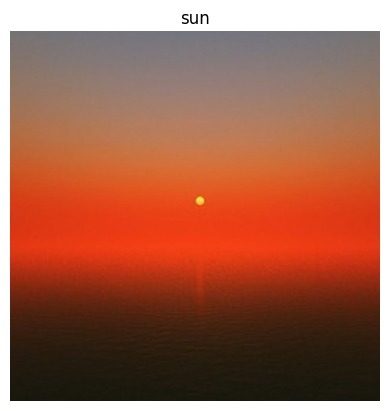

In [58]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(mpimg.imread('/content/dataset/test/sun/602.jpg'))
plt.title(pred_class)
plt.axis(False)
plt.show()